In [135]:
import pandas as pd
import numpy as np
import seaborn as sn
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [136]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [137]:
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [138]:
mean = df[numeric_cols].mean()

In [139]:
std_dev = df[numeric_cols].std()

In [140]:
df[numeric_cols].head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


In [141]:
z_scores = (df[numeric_cols] - mean) / std_dev
z_scores.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,-1.432359,0.410685,0.824621,1.382175,-0.831979
1,-0.478223,1.490940,-0.171867,0.753746,0.105606
2,-1.750404,-0.129442,0.769768,-1.524307,-0.831979
3,-0.584238,0.302660,0.138964,-1.131539,0.574398
4,0.051853,0.950812,-0.034736,-0.581664,-0.831979


In [142]:
mask = (np.abs(z_scores) < 3).all(axis = 1)

In [143]:
df_clean = df[mask].reset_index(drop=True)
df_clean

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
894,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
895,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
896,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
897,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<Axes: xlabel='HeartDisease', ylabel='Count'>

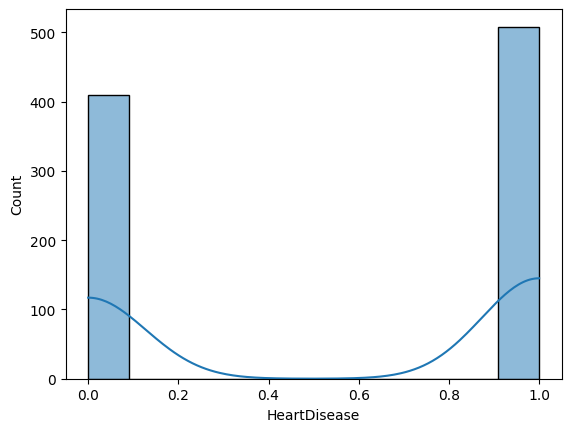

In [144]:
sn.histplot(df.HeartDisease,kde=True)

In [145]:
# df["Z_score"] = (df.HeartDisease - df.HeartDisease.mean())/df.HeartDisease.std()

In [146]:
# df

In [147]:
# df[df.Z_score<-3]

In [148]:
# df_no_outliers =  df[(df["Z_score"] > 3) ^ (df["Z_score"] < -3)]

In [149]:
# df_no_outliers

In [150]:
# df

In [151]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = df_clean
columns = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]

dfle[columns] = dfle[columns].apply(lambda columns: le.fit_transform(columns))


In [152]:
dfle

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
894,45,1,3,110,264,0,1,132,0,1.2,1,1
895,68,1,0,144,193,1,1,141,0,3.4,1,1
896,57,1,0,130,131,0,1,115,1,1.2,1,1
897,57,0,1,130,236,0,0,174,0,0.0,1,1


In [153]:
from sklearn.preprocessing import StandardScaler

# dfle.drop("Z_score", axis =1)

In [154]:
X = dfle.drop(["HeartDisease"], axis =1)
y = dfle["HeartDisease"]
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [155]:
# X = df.drop(["HeartDisease"], axis =1)
# y = df["HeartDisease"]
# X.head()

In [156]:
scaler = StandardScaler()
X_scaled =  scaler.fit_transform(X)
X_scaled

array([[-1.42815446,  0.515943  ,  0.2245723 , ..., -0.8229452 ,
        -0.85546862,  1.04249607],
       [-0.47585532, -1.93819859,  1.27063705, ..., -0.8229452 ,
         0.13751561, -0.62216462],
       [-1.7455875 ,  0.515943  ,  0.2245723 , ..., -0.8229452 ,
        -0.85546862,  1.04249607],
       ...,
       [ 0.3706328 ,  0.515943  , -0.82149245, ...,  1.21514774,
         0.33611246, -0.62216462],
       [ 0.3706328 , -1.93819859,  0.2245723 , ..., -0.8229452 ,
        -0.85546862, -0.62216462],
       [-1.63977649,  0.515943  ,  1.27063705, ..., -0.8229452 ,
        -0.85546862,  1.04249607]], shape=(899, 11))

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=30) 

In [176]:
X_train.shape

(719, 11)

In [177]:
X_test.shape

(180, 11)

In [178]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [179]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='lbfgs', max_iter=2000),
        'params': {
            'C': [1,5,10]
        }
    }    
}

In [180]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp["params"], cv=5,return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        "model": model_name,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.873417,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.851214,{'n_estimators': 10}
2,logistic_regression,0.851166,{'C': 1}


In [181]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
894,45,1,3,110,264,0,1,132,0,1.2,1
895,68,1,0,144,193,1,1,141,0,3.4,1
896,57,1,0,130,131,0,1,115,1,1.2,1
897,57,0,1,130,236,0,0,174,0,0.0,1


In [182]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca

array([[ 93.12926348,  29.67413245],
       [-16.33750689,  14.81536427],
       [ 82.66842478, -38.91589868],
       ...,
       [-68.22644416, -17.7012641 ],
       [ 40.02690223,  33.47134474],
       [-20.61151816,  37.62451392]], shape=(899, 2))

In [189]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [190]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, y_train)
model_rf.score(X_test_pca, y_test)

0.6388888888888888